In [1]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import random

# Charger les données du dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [2]:
# Afficher des informations sur le dataset
print("Taille du dataset d'entraînement :", x_train.shape)
print("Taille du dataset de test :", x_test.shape)
print("Nombre d'images d'entraînement :", len(x_train))
print("Nombre d'images de test :", len(x_test))
num_classes = len(set(y_train.flatten()))
print("Nombre de classes :", num_classes)

Taille du dataset d'entraînement : (50000, 32, 32, 3)
Taille du dataset de test : (10000, 32, 32, 3)
Nombre d'images d'entraînement : 50000
Nombre d'images de test : 10000
Nombre de classes : 10


In [3]:
# Normaliser les images et effectuer le one-hot encoding des étiquettes
x_train = x_train / 255.0
x_test = x_test / 255.0
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Le one-hot encoding des étiquettes est utilisé pour représenter de manière binaire les catégories d'étiquettes dans un format adapté à l'entraînement d'un modèle de classification.

In [4]:
# Créer et compiler le modèle séquentiel
model = models.Sequential()

# Ajouter une couche Flatten pour convertir les images en vecteurs unidimensionnels
model.add(layers.Flatten(input_shape=(32, 32, 3)))

# Ajouter une couche dense avec 512 neurones et une fonction d'activation ReLU
model.add(layers.Dense(512, activation='relu'))

# Ajouter une autre couche dense avec 10 neurones (nombre de classes) et une fonction d'activation ReLU
model.add(layers.Dense(10, activation='relu'))

# Afficher un résumé du modèle, montrant la structure des couches et le nombre de paramètres
model.summary()

# Compiler le modèle avec l'optimiseur Adam, la fonction de perte categorical_crossentropy et la métrique accuracy
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle sur les données d'entraînement avec 20 epochs, un batch size de 32, et utiliser les données de validation
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))

# Sauvegarder le modèle dans un fichier 'model.keras'
model.save('model.keras')


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1578506 (6.02 MB)
Trainable params: 1578506 (6.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 8.8778 - accuracy: 0.1781 - val_loss: 7.4530 - val_accuracy: 0.1318
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 7.3956 - accuracy: 0.2091 - val_loss: 7.3702 - val_accuracy: 0

### Créer et compiler le modèle CNN


In [5]:
# version clean of cnn with batch norm and dropout
# first convolution layer (batch norm ==> conv 3x3 ==> max pool 2x2)

# Création d'un modèle séquentiel
model_cnn = models.Sequential()

# Ajout d'une couche de normalisation de lot (Batch Normalization)
model_cnn.add(layers.BatchNormalization())

# Ajout d'une couche de convolution 3x3 avec 32 filtres et fonction d'activation ReLU
model_cnn.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Ajout d'une couche de dropout avec un taux de 0.05 pour régulariser le modèle
model_cnn.add(layers.Dropout(0.05))

# Ajout d'une couche de max pooling 2x2 pour réduire la dimensionnalité spatiale
model_cnn.add(layers.MaxPooling2D((2, 2)))

# Ajout d'une couche de normalisation de lot
model_cnn.add(layers.BatchNormalization())

# Ajout d'une couche de convolution 3x3 avec 64 filtres et fonction d'activation ReLU
model_cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Ajout d'une couche de dropout avec un taux de 0.05
model_cnn.add(layers.Dropout(0.05))

# Ajout d'une couche de max pooling 2x2
model_cnn.add(layers.MaxPooling2D((2, 2)))

# Ajout d'une couche de normalisation de lot
model_cnn.add(layers.BatchNormalization())

# Aplatir les données en un vecteur unidimensionnel
model_cnn.add(layers.Flatten())

# Ajout d'une couche de dropout avec un taux de 0.5
model_cnn.add(layers.Dropout(0.5))

# Ajout d'une couche dense avec 64 neurones et fonction d'activation ReLU
model_cnn.add(layers.Dense(64, activation='relu'))

# Ajout d'une couche de normalisation de lot
model_cnn.add(layers.BatchNormalization())

# Ajout d'une couche de dropout avec un taux de 0.1
model_cnn.add(layers.Dropout(0.1))

# Ajout d'une couche dense avec 10 neurones et fonction d'activation softmax pour la classification
model_cnn.add(layers.Dense(10, activation='softmax'))

# Compilation du modèle avec l'optimiseur Adam, la fonction de perte categorical_crossentropy, et la métrique accuracy
model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


### Entraîner le modèle CNN en utilisant ModelCheckpoint pour sauvegarder le meilleur modèle


In [6]:
# Création d'un point de contrôle pour sauvegarder le meilleur modèle basé sur la précision de validation
checkpoint = ModelCheckpoint("best_model_epoch.hdf5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')

# Liste des rappels (callbacks) à utiliser pendant l'entraînement
callbacks_list = [checkpoint]

# Entraînement du modèle avec les données d'entraînement et de validation
model_cnn.fit(x_train, y_train, batch_size=16, epochs=13, validation_data=(x_test, y_test), callbacks=callbacks_list)

# Sauvegarde du modèle entraîné
model_cnn.save('model_cnn.keras')


Epoch 1/13
3123/3125 [============================>.] - ETA: 0s - loss: 1.4452 - accuracy: 0.4882
Epoch 1: val_accuracy improved from -inf to 0.57990, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 27s 9ms/step - loss: 1.4452 - accuracy: 0.4883 - val_loss: 1.1929 - val_accuracy: 0.5799
Epoch 2/13
  17/3125 [..............................] - ETA: 31s - loss: 1.1365 - accuracy: 0.6103

/Users/yuss/Documents/cours_m2/machineLearning/tp4/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


3120/3125 [============================>.] - ETA: 0s - loss: 1.1460 - accuracy: 0.5988
Epoch 2: val_accuracy improved from 0.57990 to 0.67530, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 35s 11ms/step - loss: 1.1457 - accuracy: 0.5989 - val_loss: 0.9470 - val_accuracy: 0.6753
Epoch 3/13
3120/3125 [============================>.] - ETA: 0s - loss: 1.0505 - accuracy: 0.6339
Epoch 3: val_accuracy improved from 0.67530 to 0.70910, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 33s 11ms/step - loss: 1.0505 - accuracy: 0.6338 - val_loss: 0.8559 - val_accuracy: 0.7091
Epoch 4/13
3123/3125 [============================>.] - ETA: 0s - loss: 0.9924 - accuracy: 0.6549
Epoch 4: val_accuracy improved from 0.70910 to 0.71160, saving model to best_model_epoch.hdf5
3125/3125 [==============================] - 32s 10ms/step - loss: 0.9922 - accuracy: 0.6550 - val_loss: 0.8336 - val_accuracy: 0.7116
Epoch 5/13
3125/3125 [========

### Afficher quelques images de test avec les prédictions du modèle CNN

### Afficher les images avec les prédictions

1/1 [==============================] - 0s 19ms/step


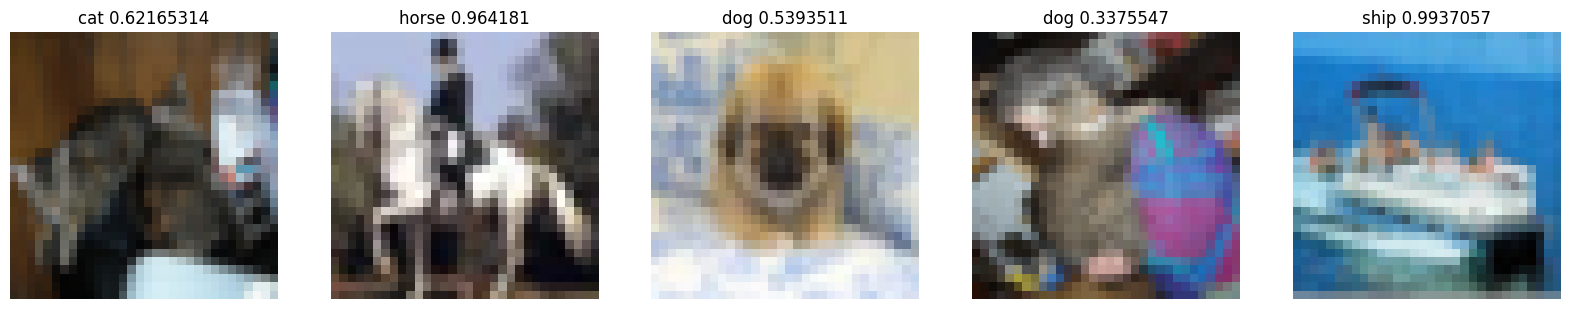

In [10]:
# Sélection aléatoire de 5 images du jeu de test
images = x_test[random.sample(range(0, len(x_test)), 5)]

# Prédiction de la classe de chaque image à l'aide du modèle entraîné (model_cnn)
predictions = model_cnn.predict(images)

# Liste des classes possibles dans le jeu de données CIFAR-10
classes = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

# Affichage des images prédites avec leurs classes et probabilités associées
fig = plt.figure(figsize=(20, 20))
for i in range(len(images)):
    fig.add_subplot(1, 5, (i+1)*1)  # Configuration de la disposition des sous-graphiques (1 ligne, 5 colonnes)
    plt.imshow(images[i])  # Affichage de l'image
    plt.axis('off')  # Désactivation des axes
    best = max(predictions[i])  # Récupération de la probabilité maximale prédite
    class_name = classes[list(predictions[i]).index(best)]  # Récupération du nom de la classe correspondant à la probabilité maximale
    plt.title(class_name + " " + str(best))  # Affichage du nom de la classe et de la probabilité maximale